## Загрузим нужные библиотеки

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

%matplotlib inline

### Считаем тренировочный набор

In [ ]:
df_issues_train = pd.read_csv("/content/train_issues.csv")
df_comment_train = pd.read_csv("/content/train_comments.csv")

df_emp = pd.read_csv("/content/employees.csv")

## Рассмотрим датасет по ближе

In [ ]:
df_issues_train.head(3)

,id,created,key,summary,project_id,assignee_id,creator_id,overall_worklogs
0,819952,2019-10-01 05:57:18.000,SM-10678,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800
1,819949,2019-10-01 05:59:45.000,SM-10679,"UI тесты раздела ""Профиль""",5,93,93,7200
2,819947,2019-10-01 06:00:38.000,SM-10680,"UI тесты раздела ""Личный счет""",5,93,93,14400


In [ ]:
df_issues_train.shape

(9589, 8)

In [ ]:
df_issues_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9589 entries, 0 to 9588
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                9589 non-null   int64 
 1   created           9589 non-null   object
 2   key               9589 non-null   object
 3   summary           9589 non-null   object
 4   project_id        9589 non-null   int64 
 5   assignee_id       9589 non-null   int64 
 6   creator_id        9589 non-null   int64 
 7   overall_worklogs  9589 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 599.4+ KB


In [ ]:
df_comment_train.head(3)

,comment_id,text,issue_id,author_id
0,11779,[https://www.youtube.com/watch?v=tuhOdtsvoNY|h...,669666,1
1,10601,OK [~accountid:557058:3f7ab89a-8969-4547-90df-...,669670,1
2,76101,I encountered a problem with access to `/users...,670930,2


In [ ]:
df_comment_train.shape

(13918, 4)

In [ ]:
df_comment_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13918 entries, 0 to 13917
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          13918 non-null  int64 
 1   created     13918 non-null  object
 2   updated     13918 non-null  object
 3   comment_id  13918 non-null  int64 
 4   text        13918 non-null  object
 5   issue_id    13918 non-null  int64 
 6   author_id   13918 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 761.3+ KB


### Преобразование столбцов

Сделаем два столбца - день и месяц создания задачи

In [ ]:
df_issues_train["mounth"] = df_issues_train.created.map(lambda x : int(x.split("-")[1]))
df_issues_train["day"] = df_issues_train.created.map(lambda x : int(x.split("-")[2].split()[0]))

Удалим не нужную информацию о работниках

In [ ]:
df_emp = df_emp.drop(["active","full_name", "salary_calculation_type", "passport"],axis = 1)

KeyError: ignored

Обьединим два набора данных по id исполнителя

In [ ]:
df_train = pd.merge(df_issues_train, df_emp, left_on="assignee_id", right_on="id", how='inner')

In [ ]:
df_train.shape

(9589, 19)

In [ ]:
df_train = df_train.fillna(0)

 Создадим список всех не числовых лейблов и взглянем на них

In [ ]:
mass_object = df_train.dtypes[df_train.dtypes == "object"].index.values

In [ ]:
df_train[mass_object].head(3)

,created,key,summary,mounth,day,position,hiring_type,payment_type,english_level
0,2019-10-01 05:57:18.000,SM-10678,"UI тесты по заказу ""Добро КейДжи""",10,01,Разработчик мобильных приложений,staff,fixed,0
1,2019-10-01 05:59:45.000,SM-10679,"UI тесты раздела ""Профиль""",10,01,Разработчик мобильных приложений,staff,fixed,0
2,2019-10-01 06:00:38.000,SM-10680,"UI тесты раздела ""Личный счет""",10,01,Разработчик мобильных приложений,staff,fixed,0


Взглянем на них поближе

In [ ]:
df_train.hiring_type.value_counts()

staff        7005
0            1959
non_staff     625
Name: hiring_type, dtype: int64

In [ ]:
df_train.payment_type.value_counts()

fixed     5765
0         2060
hourly    1764
Name: payment_type, dtype: int64

In [ ]:
df_train.english_level.value_counts()

0     9055
B1     358
C1     176
Name: english_level, dtype: int64

Сменим им тип данных

In [ ]:
df_train["payment_type"] = pd.Categorical(df_train["payment_type"])
df_train["payment_type"].astype('category').cat.codes
df_train["payment_type"] = df_train["payment_type"].cat.codes

In [ ]:
df_train["hiring_type"] = pd.Categorical(df_train["hiring_type"])
df_train["hiring_type"].astype('category').cat.codes
df_train["hiring_type"] = df_train["hiring_type"].cat.codes

In [ ]:
df_train["english_level"] = pd.Categorical(df_train["english_level"])
df_train["english_level"].astype('category').cat.codes
df_train["english_level"] = df_train["english_level"].cat.codes

Распределение различных значений

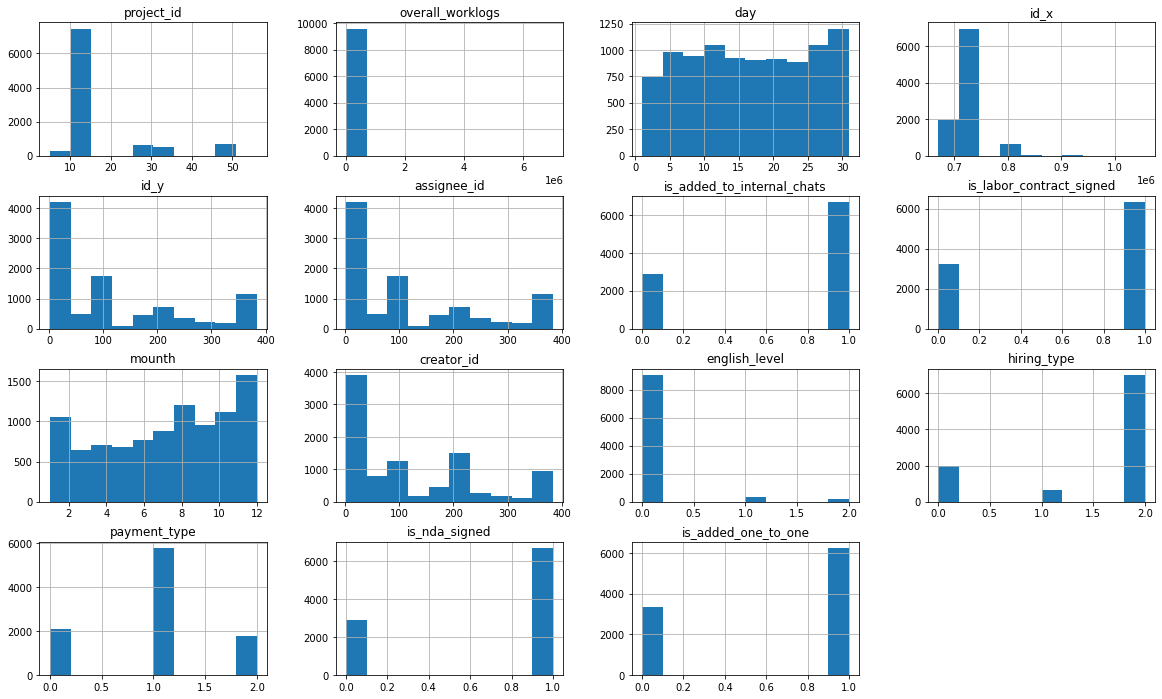

In [ ]:
mass_object = df_train.dtypes[df_train.dtypes == "object"].index.values
features = list(set(df_train.columns.to_list()) - set(mass_object))

_ = df_train[features].hist(figsize=(20,12))

Рассмторим корреляцию всех признаков

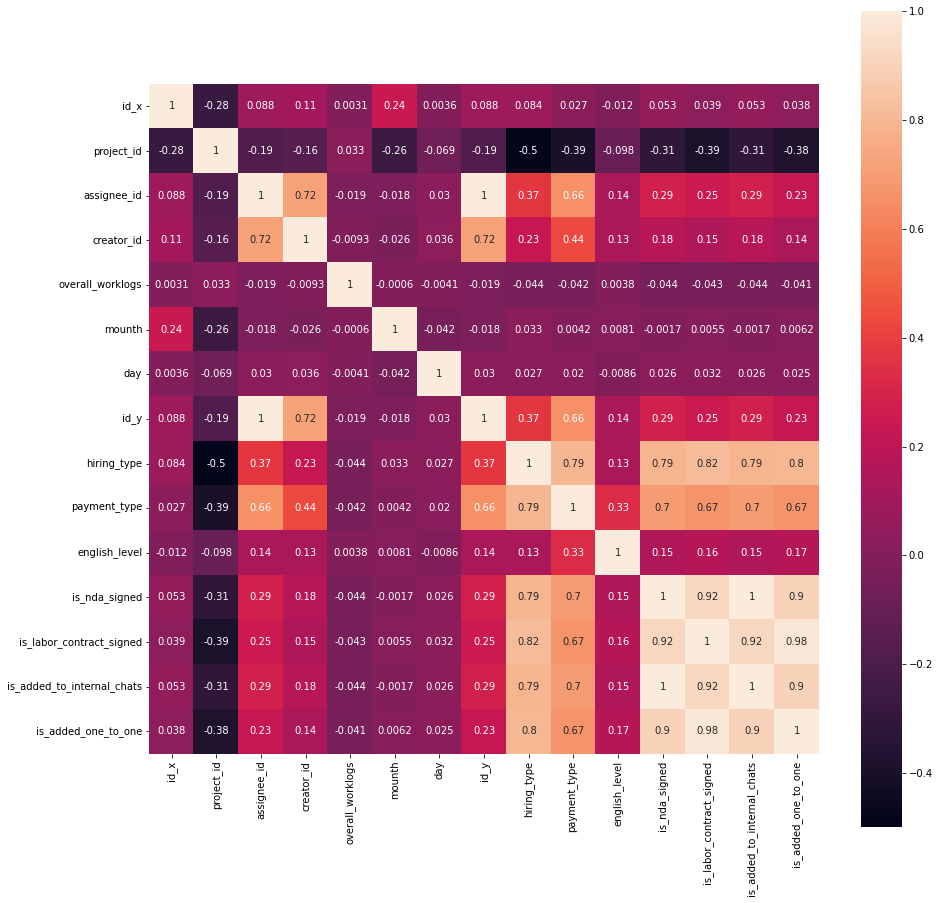

In [ ]:
plt.rcParams['figure.figsize']=(15,15)

corr = df_train.corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

Удалим все лишние столбцы из выборки

In [ ]:
mass_object = df_train.dtypes[df_train.dtypes == "object"].index.values

In [ ]:
stuff = ["id_x","id_y","overall_worklogs"]

mass_object = np.append(mass_object, stuff)

In [ ]:
X = df_train.drop(mass_object, axis = 1)
y = df_train[["overall_worklogs"]]

In [ ]:
X.head(3)

,project_id,assignee_id,creator_id,mounth,day,hiring_type,payment_type,english_level,is_nda_signed,is_labor_contract_signed,is_added_to_internal_chats,is_added_one_to_one
0,5,93,93,10,1,2,1,0,1,1,1,1
1,5,93,93,10,1,2,1,0,1,1,1,1
2,5,93,93,10,1,2,1,0,1,1,1,1


In [ ]:
X.shape

(9589, 12)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучение модели

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(random_state=0)

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(random_state=0)

## Оценка точности

In [ ]:
pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

score = r2_score(y_test, pred)

In [ ]:
score

-0.15249833138226698